# Jupyter Notebooks Introduction
  
## Description
The [Jupyter Notebook](http://jupyter.org) provides a means of creating
documents containing text, analyses, data visualizations along with the code
used to produce them all. This workshop will provide an introduction to the
interface and how it can be used for interactive code development and a means
of sharing documents with others.

## Learning objectives
1. Gain familiarity with the Jupyter Notebook interface and markdown language format
2. Use python to create a plot
3. Apply interactive programming to data analyses

## Lesson
### Overview
- Reproducibility: This is one of the primary goals of the Jupyter project. By integrating code with documentation, it makes it easier to share and reproduce one's work.
- Architecture
    - Front-end
        - Web application (i.e. your browser)
        - Notebook files (.ipynb files)
    - Back-end
        - Kernel (the language, such as python or R)
        - Notebook Server (communication between browser & kernel)
    - Additional explanations (and the source of this image) can be found [here](https://github.com/Reproducible-Science-Curriculum/introduction-RR-Jupyter/blob/master/notebooks/Jupyter_Intro_Background.ipynb).
<img src="images/notebook_components.png" style="width: 500px" />

- Example
    - [Modeling earthquake likelihoods](http://nbviewer.jupyter.org/github/cossatot/lanf_earthquake_likelihood/blob/master/notebooks/lanf_manuscript_notebook.ipynb)

### First Use
- Install [Anaconda](http://continuum.io/downloads) (also installs jupyter notebook)
- Start up `jupyter notebook` from Terminal (OS X / Linux) or Command Prompt (Windows)
- Create a new notebook using the "New" button in the top-right corner.
- Select "Python 3" under the Notebooks section

In [1]:
print("hello world!")

hello world!


- Add a new cell via Insert > Cell below
- Select "Markdown" from the dropdown menu (default is "Code")

This is my first notebook!

- Use markdown syntax to add some styling to the code above (enclose the word first in asterisks (*)

This is my *first* notebook!

### Step back
Remember why we are using Jupyter - reproducibility! A key to making things re-useable is good organization. Here we organize our files by the step the files are used in the analysis process. Consider, for the most part, that information flow is one-way:

> INPUT &rarr; ANALYSIS &rarr; RESULTS

We are going to create three directories that mirror this organization and put files in the corresponding folder:

> data &rarr; code &rarr; output

### Plot some data!
- Start by creating three folders: data, code, and output. Folders can be created with the 'New' dropdown button at the top right of the screen.
- Navigate into the code folder and create a new Python notebook. Rename it plot-gapminder (click on 'Untitled' up at the top of the page and type in the new name).
- Start the notebook with a cell of Markdown and add some brief details.

# Plotting gapminder data
Jeff Oliver  
17 February 2017

- Insert a code cell after this markdown cell and import required packages

In [17]:
import pandas
import matplotlib.pyplot as matplot

/home/jcoliver/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


- Read in the data from the url

In [2]:
url = "http://tinyurl.com/qb83k3z"
gapminder = pandas.read_table(url, sep = ",")

- Do a quick investigation of the data

In [3]:
gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


- Notice these data are capital-T Tidy:

   - Each *variable* has its own *column*
   - Each *observation* has its own *row*

- Add some markdown indicating that we want to look at data from year 2000

Subsetting the gapminder data set so we only look at data from 2000:

In [13]:
gapminder_subset = gapminder[gapminder['year'] == 2000]

- Plot data for the subset

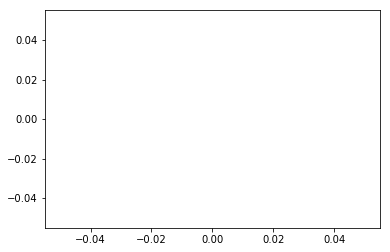

In [18]:
matplot.figure()
matplot.scatter(gapminder_subset['gdpPercap'], gapminder_subset['lifeExp'])
matplot.show()

**What happened?** Where are our points? Take a look at our dataset:

In [19]:
gapminder_subset.head()

,country,year,pop,continent,lifeExp,gdpPercap


There are zero rows...this is because when we subsetted our data for the year 2000, but it turns out there aren't any rows of data where the year is 2000. Look at the possible values for 'year' in our original data frame:

In [21]:
gapminder.groupby('year').count()

,country,pop,continent,lifeExp,gdpPercap
year,,,,,
1952,142,142,142,142,142
1957,142,142,142,142,142
1962,142,142,142,142,142
1967,142,142,142,142,142
1972,142,142,142,142,142
1977,142,142,142,142,142
1982,142,142,142,142,142
1987,142,142,142,142,142
1992,142,142,142,142,142


OK, so no data for 2000. Instead let's plot data from 2002. Rather than type in all our code again, we just have to update the code in the cell where we subsetted the data:

In [23]:
gapminder_subset = gapminder[gapminder['year'] == 2002]

Now we can re-run the plotting cells:

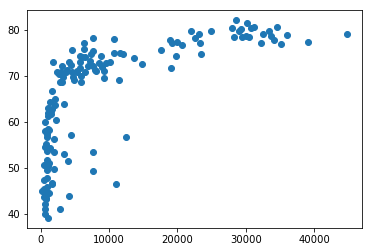

In [26]:
matplot.figure()
matplot.scatter(gapminder_subset['gdpPercap'], gapminder_subset['lifeExp'])
matplot.show()

Hmm...maybe we want that x-axis on a log-scale. We need to add a bit of code to our plotting cell:

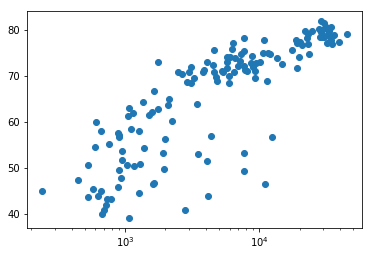

In [27]:
matplot.figure()
matplot.scatter(gapminder_subset['gdpPercap'], gapminder_subset['lifeExp'])
matplot.xscale('log') #NEW
matplot.show()

And what about axis labels?

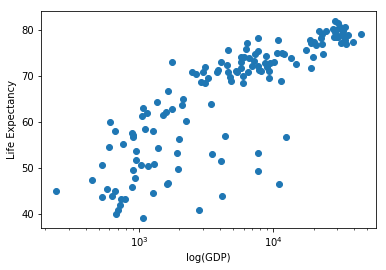

In [28]:
matplot.figure()
matplot.scatter(gapminder_subset['gdpPercap'], gapminder_subset['lifeExp'])
matplot.xscale('log')
matplot.xlabel('log(GDP)') #NEW
matplot.ylabel('Life Expectancy') #NEW
matplot.show()

And now that we have this nice plot, we should add a little markdown to indicate the relationship we are plotting. We can even use LaTeX formatted equations! (use a new line with two spaces to add some vertical separation between the statement and the formula.)

Here we show the relationship between life expectancy and the per capita GDP for 2002:
  
$$lifeExp=log(GDP) + \epsilon$$

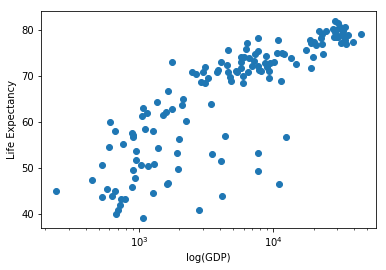

In [29]:
matplot.figure()
matplot.scatter(gapminder_subset['gdpPercap'], gapminder_subset['lifeExp'])
matplot.xscale('log')
matplot.xlabel('log(GDP)') #NEW
matplot.ylabel('Life Expectancy') #NEW
matplot.show()

### Sharing
Now we want to share our work. How can we do this? The easiest way is to just share the notebook file (this one should be called plot-gapminder.ipynb). We can also export a version of the file through the File menu 'Download as >' option (although this will not preserve the interactivity of the code, as would a Jupyter notebook file format). If you know how to use git, you can put your Jupyter Notebooks up on GitHub for folks to see (that's how you're seeing this one - it's hosted at https://github.com/jcoliver/jupyter-lesson/blob/master/Intro-to-Jupyter.ipynb).

### Additional resources
- Resources
    - The [Jupyter Project homepage](http://jupyter.org)
    - This [lesson](https://github.com/jcoliver/jupyter-lesson/blob/master/Intro-to-Jupyter.ipynb)
    - The Jupyter [Markdown reference](http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Working%20With%20Markdown%20Cells.html) guide
- Examples
    - Plotting in python
        - [Linear regression in python](http://nbviewer.jupyter.org/github/jackbrucesimpson/Reference/blob/master/notebooks/practical_ml_2.ipynb)
        - [2D and 3D plotting](http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb)
    - Other good examples of Jupyter Notebooks
        - [Psychrometrics](http://nbviewer.jupyter.org/github/jckantor/CBE20255/blob/master/notebooks/Psychrometrics.ipynb)
        - [Plotting pitfalls](https://anaconda.org/jbednar/plotting_pitfalls/notebook)
        - [XKCD plots in Matplotlib](http://nbviewer.jupyter.org/url/jakevdp.github.com/downloads/notebooks/XKCD_plots.ipynb)
        - [Travelling salesman](http://nbviewer.jupyter.org/url/norvig.com/ipython/TSP.ipynb)
        - [Modeling earthquake likelihoods](http://nbviewer.jupyter.org/github/cossatot/lanf_earthquake_likelihood/blob/master/notebooks/lanf_manuscript_notebook.ipynb)
        - [Fisher's geometric model](http://nbviewer.jupyter.org/url/www.sciencedirect.com/science/MiamiMultiMediaURL/1-s2.0-S0040580914000811/1-s2.0-S0040580914000811-mmc1.txt/272364/FULL/S0040580914000811/471cf02085a52c248dc76ae65ad4409d/mmc1.txt)